
Jumlah total data   : 144
Jumlah data latih   : 100 (69.44%)
Jumlah data uji     : 44 (30.56%)


Hasil Evaluasi Model (Format Tabel Mendatar):
                     Accuracy  Precision (0)  Recall (0)  F1-Score (0)  Precision (1)  Recall (1)  F1-Score (1)  Macro Average Precision  Macro Average Recall  Macro Average F1-Score
SVM                      0.50           0.86        0.49          0.62           0.17        0.57          0.27                     0.52                  0.53                    0.44
Naive Bayes              0.84           0.84        1.00          0.91           0.00        0.00          0.00                     0.42                  0.50                    0.46
Logistic Regression      0.48           0.85        0.46          0.60           0.17        0.57          0.26                     0.51                  0.52                    0.43

Confusion Matrix untuk SVM:


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

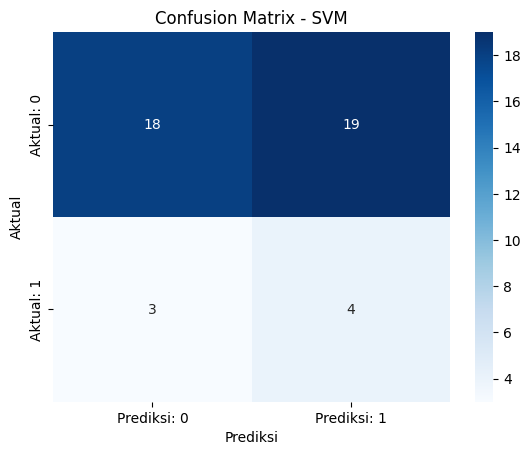


Confusion Matrix untuk Naive Bayes:


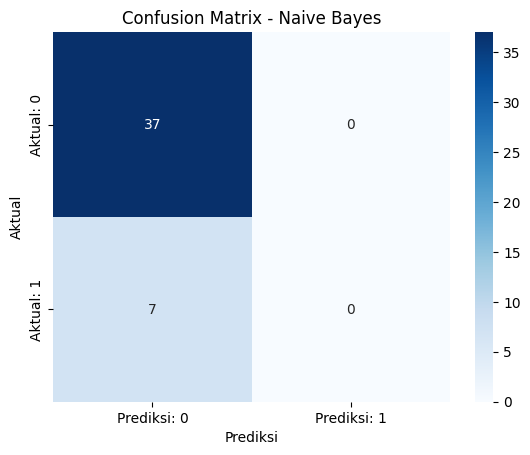


Confusion Matrix untuk Logistic Regression:


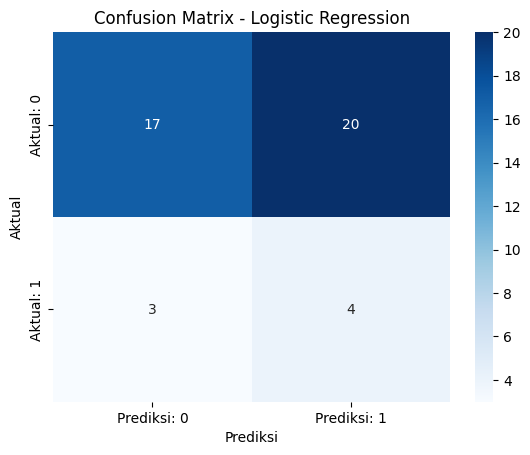

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_10176\2037366638.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')


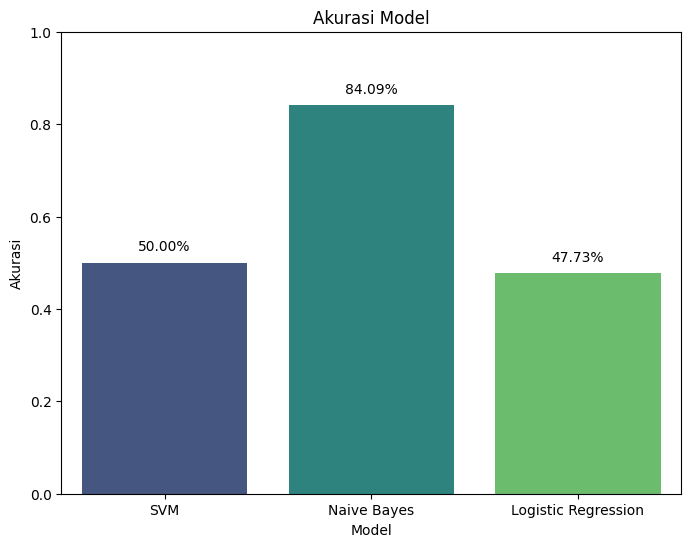

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Mengimpor data dari file Excel
df = pd.read_excel('D:\KULIAH 2023\PENELITIAN\File\data_dbd_purwokerto_2022_2024.xlsx')

# Mengubah target variabel (Jumlah Kasus DBD) menjadi biner (0 atau 1)
df['Kasus DBD (0=Tidak, 1=Ya)'] = (df['Jumlah Kasus DBD'] > 5).astype(int)

# Preprocessing Data
X = df[['Suhu (C)', 'Kelembaban (%)', 'Curah Hujan (mm)', 'Bulan']]  # Fitur
y = df['Kasus DBD (0=Tidak, 1=Ya)']  # Target

# Membagi Data menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan jumlah dan persentase data latih dan data uji
total_data = len(df)
train_size = len(X_train)
test_size = len(X_test)

print('\n=================================')
print(f"Jumlah total data   : {total_data}")
print(f"Jumlah data latih   : {train_size} ({train_size/total_data*100:.2f}%)")
print(f"Jumlah data uji     : {test_size} ({test_size/total_data*100:.2f}%)")
print('=================================\n')

# Standarisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fungsi untuk evaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, class_report, conf_matrix

# Menyimpan hasil evaluasi untuk semua model
results = {}

# Fungsi untuk menambahkan hasil evaluasi ke dictionary 'results'
def add_class_report_to_results(model_name, accuracy, class_report, conf_matrix, results_dict):
    results_dict[model_name] = {
        "Accuracy": accuracy,
        "Precision (0)": class_report['0']['precision'] if '0' in class_report else 0,
        "Recall (0)": class_report['0']['recall'] if '0' in class_report else 0,
        "F1-Score (0)": class_report['0']['f1-score'] if '0' in class_report else 0,
        "Precision (1)": class_report['1']['precision'] if '1' in class_report else 0,
        "Recall (1)": class_report['1']['recall'] if '1' in class_report else 0,
        "F1-Score (1)": class_report['1']['f1-score'] if '1' in class_report else 0,
        "Macro Average Precision": class_report['macro avg']['precision'],
        "Macro Average Recall": class_report['macro avg']['recall'],
        "Macro Average F1-Score": class_report['macro avg']['f1-score'],
        "Confusion Matrix": conf_matrix
    }

# Evaluasi SVM dengan class_weight='balanced'
svm_model = SVC(kernel='linear', class_weight='balanced')
accuracy, class_report, conf_matrix = evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test)
add_class_report_to_results('SVM', accuracy, class_report, conf_matrix, results)

# Evaluasi Naive Bayes
nb_model = GaussianNB()
accuracy, class_report, conf_matrix = evaluate_model(nb_model, X_train_scaled, X_test_scaled, y_train, y_test)
add_class_report_to_results('Naive Bayes', accuracy, class_report, conf_matrix, results)

# Evaluasi Logistic Regression
logreg_model = LogisticRegression(class_weight='balanced')
accuracy, class_report, conf_matrix = evaluate_model(logreg_model, X_train_scaled, X_test_scaled, y_train, y_test)
add_class_report_to_results('Logistic Regression', accuracy, class_report, conf_matrix, results)

# Menyusun DataFrame untuk hasil evaluasi dari ketiga model
results_df = pd.DataFrame(results).T

# Membulatkan nilai numerik ke 2 angka di belakang koma
results_df_rounded = results_df.copy()
for col in results_df_rounded.columns:
    if col != 'Confusion Matrix':
        results_df_rounded[col] = results_df_rounded[col].apply(lambda x: round(x, 2))

# Menampilkan DataFrame yang sudah dirapikan seperti tabel
print("\nHasil Evaluasi Model (Format Tabel Mendatar):")
print("=" * 120)
with pd.option_context('display.max_columns', None, 'display.width', 200):
    print(results_df_rounded.drop(columns='Confusion Matrix').to_string())
print("=" * 120)

# Menampilkan Confusion Matrix
for model in results_df.index:
    print(f"\nConfusion Matrix untuk {model}:")
    conf_matrix = results_df.loc[model, 'Confusion Matrix']
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi: 0', 'Prediksi: 1'], yticklabels=['Aktual: 0', 'Aktual: 1'])
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

# Visualisasi Akurasi Model
plt.figure(figsize=(8, 6))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)  # Agar skala akurasi tetap antara 0 dan 1

# Menambahkan label persentase akurasi pada setiap bar
for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.02, f"{v*100:.2f}%", ha='center', va='bottom')

plt.show()
